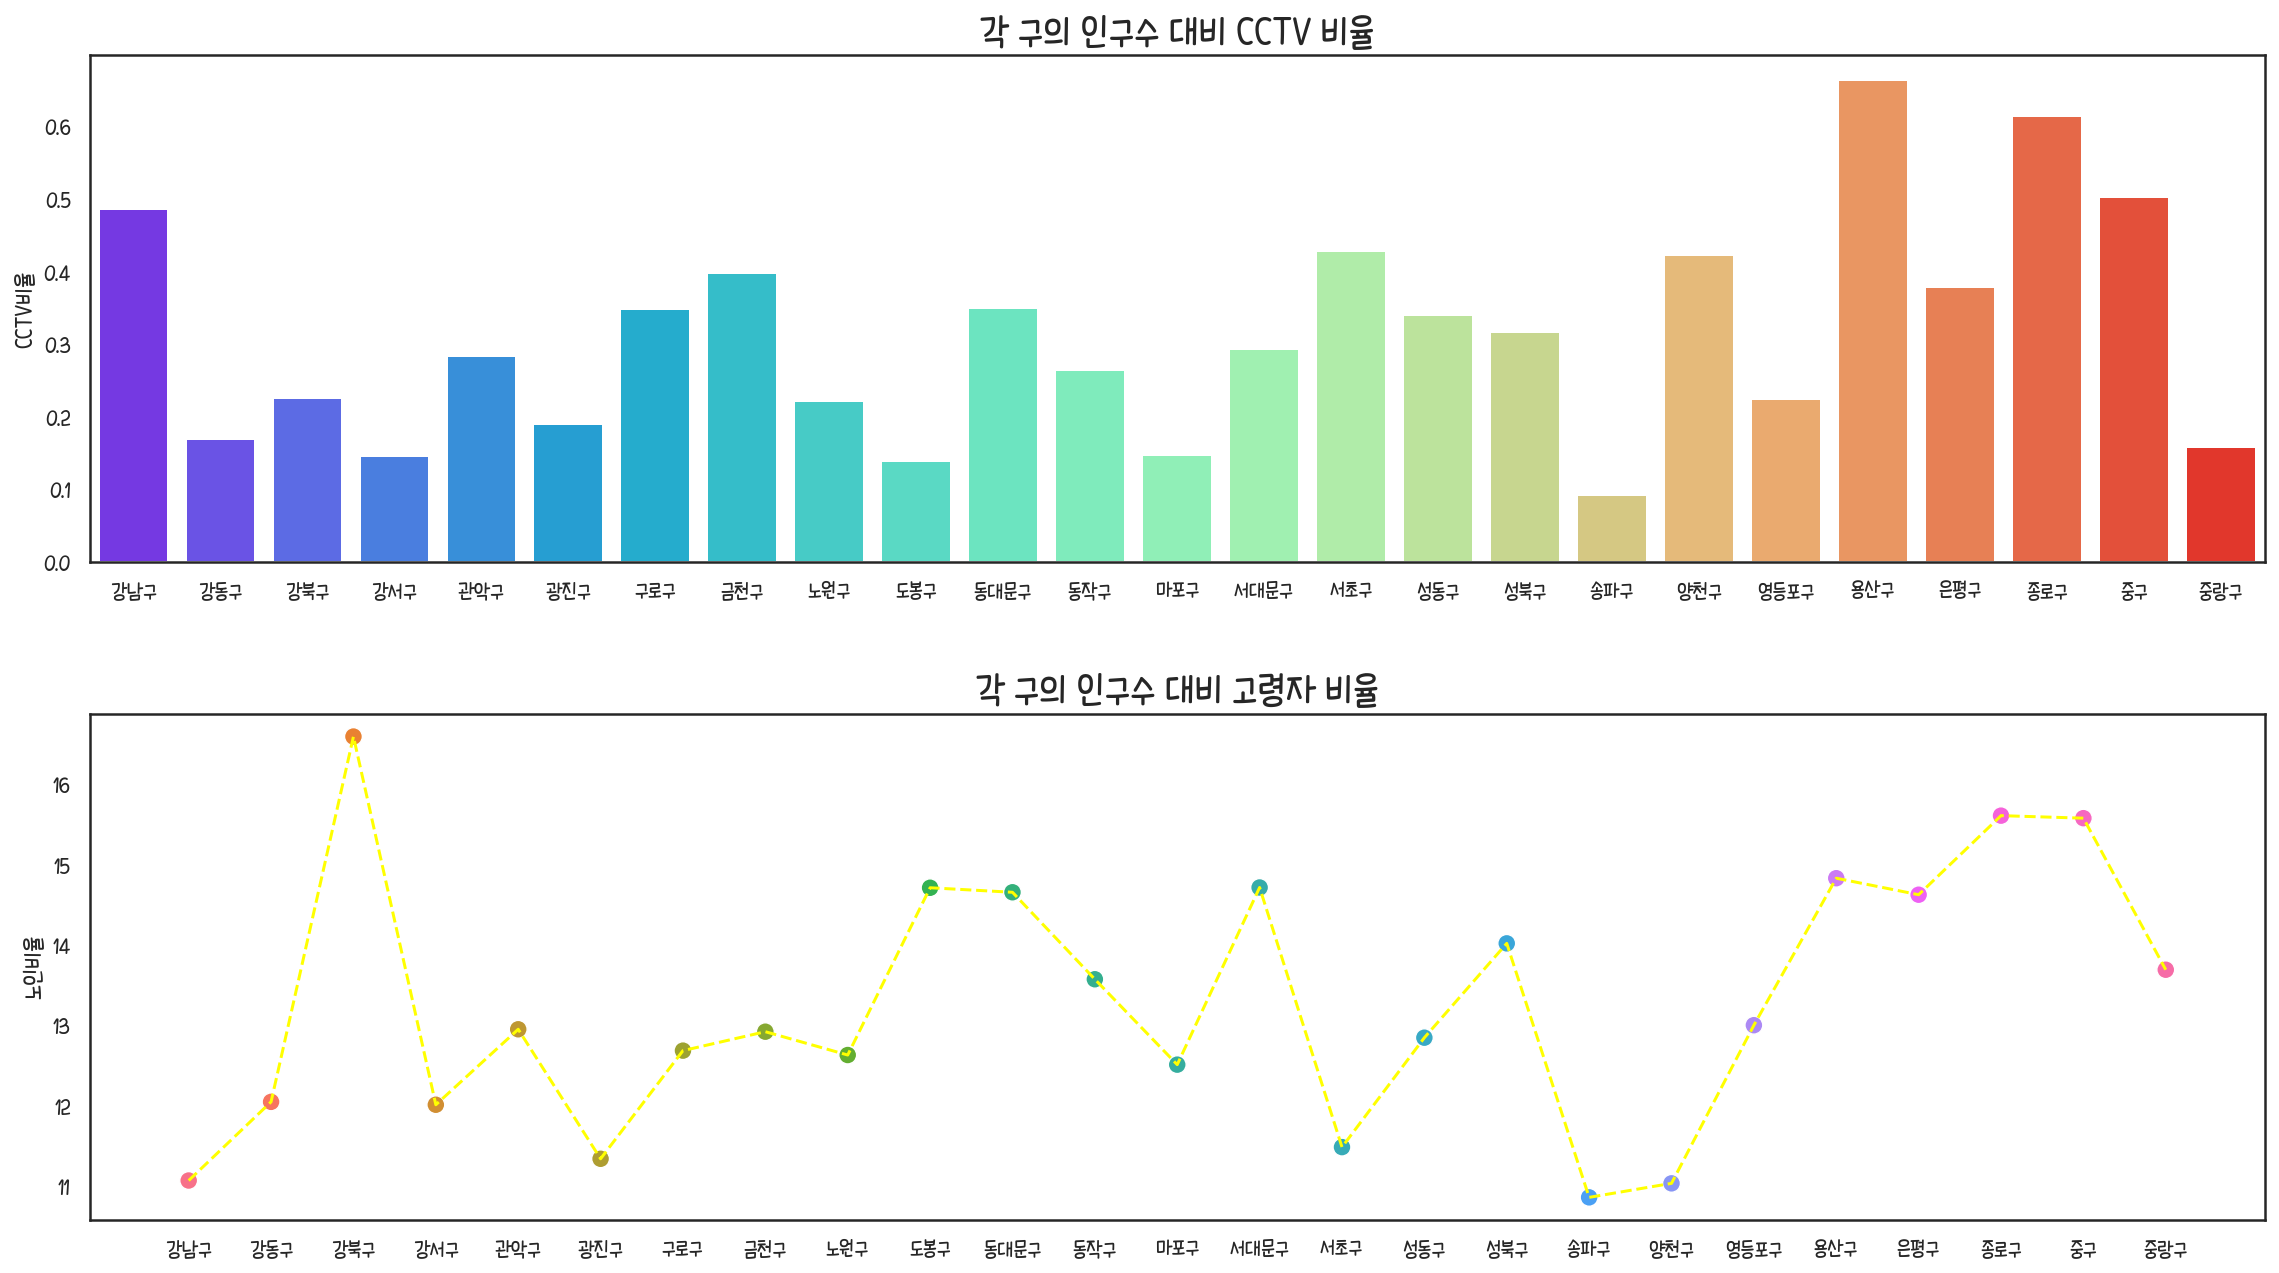

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

%config InlineBackend.figure_format='retina' # 화면 해상도 향상

df = pd.read_csv('../data/cctv_seoul.csv')
df.set_index('구별', inplace=True)

df['CCTV비율'] = df['CCTV수'] / df['인구수'] * 100  # 인구 100명당 CCTV 비율
df['노인비율'] = df['고령자'] / df['인구수'] * 100   # 인구수 대비 노인 백분율
# df.head()

fig, axes = plt.subplots(figsize=(16,9), nrows=2) # constrained=True -> plt.tight_layout(h_pad=2) 못씀 
sns.set()
sns.set(style='white', font='THEGaeideuk', rc={"axes.unicode_minus": False})

sns.barplot(data=df, x=df.index, y='CCTV비율', ax=axes[0], palette='rainbow')
axes[0].set_title('각 구의 인구수 대비 CCTV 비율', size=20)
axes[0].set_xlabel(None)

sns.scatterplot(data=df, x=df.index, y='노인비율', hue='구별', ax=axes[1], s=80, legend=None) # s = all markers size
sns.lineplot(data=df, x=df.index, y='노인비율', ax=axes[1], color='yellow', linestyle='dashed')
axes[1].set_title('각 구의 인구수 대비 고령자 비율', size=20)
axes[1].set_xlabel(None)

plt.tight_layout(h_pad=3) # 위아래 padding

plt.savefig('./hw3.png')
plt.show()